# Advanced Financial Analysis with Python

In this notebook, we present an advanced financial analysis module developed in Python. The module, `AdvancedFinancialAnalyzer`, 
combines multiple financial analysis strategies such as Moving Averages, Volume Analysis, Bollinger Bands, MACD (Moving Average Convergence Divergence), 
RSI (Relative Strength Index), and Fibonacci Retracement levels. This tool is designed to provide comprehensive insights into stock price data, 
helping traders and financial analysts make informed decisions based on various technical indicators and patterns.

## Features
- **Exponential Moving Average (EMA):** Helps in identifying the trend direction and its strength.
- **MACD:** A trend-following momentum indicator showing the relationship between two moving averages of a security's price.
- **Bollinger Bands:** A type of statistical chart characterizing the prices and volatility over time.
- **RSI:** A momentum indicator measuring the magnitude of recent price changes.
- **Fibonacci Retracement:** A tool used for identifying potential support and resistance levels.

## Example Usage
We will demonstrate the usage of this module with Apple Inc. (AAPL) stock data. The module processes the data to calculate various indicators and 
identifies potential buy and sell signals based on these indicators.

### Requirements
- pandas
- numpy
- matplotlib

Let's begin by defining the `AdvancedFinancialAnalyzer` class and then proceed to apply it to real stock data.


In [2]:
import logging
import pandas as pd
import numpy as np

# Initialize logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

class AdvancedFinancialAnalyzer:
    # Class implementation here
    @staticmethod
    def validate_data(stock_data: pd.DataFrame, required_columns: list) -> bool:
        """
        Validate if the required columns are present in the DataFrame.

        :param stock_data: DataFrame to be validated.
        :param required_columns: List of column names that are required.
        :return: True if all required columns are present, False otherwise.
        """
        missing_columns = [col for col in required_columns if col not in stock_data.columns]
        if missing_columns:
            logger.error(f"Missing required columns: {missing_columns}")
            return False
        return True

    @staticmethod
    def compute_ema(stock_data: pd.DataFrame, window: int, column: str = 'Close') -> pd.Series:
        """
        Compute Exponential Moving Average (EMA) for a given column.

        EMA is a type of moving average that places a greater weight and significance
        on the most recent data points. It's commonly used to identify the direction
        of a trend or to determine its strength.

        :param stock_data: DataFrame containing stock data.
        :param window: Integer representing the period of the EMA.
        :param column: The column on which EMA is to be computed.
        :return: Series containing the computed EMA values.
        """
        return stock_data[column].ewm(span=window, adjust=False).mean()

    @staticmethod
    def compute_macd(stock_data: pd.DataFrame, short_window: int = 12, long_window: int = 26,
                     signal_window: int = 9) -> pd.DataFrame:
        """
        Compute Moving Average Convergence Divergence (MACD) and Signal Line.

        MACD is a trend-following momentum indicator that shows the relationship between
        two moving averages of a security's price. The MACD is calculated by subtracting
        the 26-period EMA from the 12-period EMA. The result of that calculation is the
        MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted
        on top of the MACD line, which can function as a trigger for buy and sell signals.

        :param stock_data: DataFrame containing stock data.
        :param short_window: Integer representing the short period EMA.
        :param long_window: Integer representing the long period EMA.
        :param signal_window: Integer representing the signal line EMA.
        :return: DataFrame with the MACD and Signal Line added.
        """
        if not AdvancedFinancialAnalyzer.validate_data(stock_data, ['Close']):
            return stock_data

        stock_data['MACD'] = AdvancedFinancialAnalyzer.compute_ema(stock_data,
                                                                   short_window) - AdvancedFinancialAnalyzer.compute_ema(
            stock_data, long_window)
        stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=signal_window, adjust=False).mean()
        return stock_data

    @staticmethod
    def compute_bollinger_bands(stock_data: pd.DataFrame, window: int = 20, num_std: int = 2,
                                column: str = 'Close') -> pd.DataFrame:
        """
        Compute Bollinger Bands.

        Bollinger Bands are a type of statistical chart characterizing the prices and
        volatility over time of a financial instrument or commodity, using a formulaic
        method propounded by John Bollinger in the 1980s. They consist of a middle band
        being an N-period simple moving average (SMA), an upper band at K times an N-period
        standard deviation above the middle band, and a lower band at K times an N-period
        standard deviation below the middle band.

        :param stock_data: DataFrame containing stock data.
        :param window: Integer representing the moving average window size.
        :param num_std: Integer representing the number of standard deviations from the moving average.
        :param column: The column on which Bollinger Bands are to be computed.
        :return: DataFrame with Bollinger Bands (Mid, Upper, Lower) added.
        """
        if not AdvancedFinancialAnalyzer.validate_data(stock_data, [column]):
            return stock_data

        rolling_mean = stock_data[column].rolling(window=window).mean()
        rolling_std = stock_data[column].rolling(window=window).std()
        stock_data['Bollinger_Mid'] = rolling_mean
        stock_data['Bollinger_Upper'] = rolling_mean + (rolling_std * num_std)
        stock_data['Bollinger_Lower'] = rolling_mean - (rolling_std * num_std)
        return stock_data

    @staticmethod
    def compute_rsi(stock_data: pd.DataFrame, window: int = 14, column: str = 'Close') -> pd.DataFrame:
        """
        Compute Relative Strength Index (RSI).

        RSI is a momentum indicator that measures the magnitude of recent price changes
        to evaluate overbought or oversold conditions in the price of a stock or other asset.
        It is displayed as an oscillator (a line graph that moves between two extremes) and
        can have a reading from 0 to 100. The indicator was originally developed by J. Welles
        Wilder Jr. and introduced in his seminal 1978 book, "New Concepts in Technical Trading Systems."

        :param stock_data: DataFrame containing stock data.
        :param window: Integer representing the RSI calculation period.
        :param column: The column on which RSI is to be computed.
        :return: DataFrame with the RSI values added.
        """
        if not AdvancedFinancialAnalyzer.validate_data(stock_data, [column]):
            return stock_data

        delta = stock_data[column].diff()
        gain = (delta.clip(lower=0)).rolling(window=window).mean()
        loss = (-delta.clip(upper=0)).rolling(window=window).mean()
        rs = gain / loss
        stock_data['RSI'] = 100 - (100 / (1 + rs))
        return stock_data

    @staticmethod
    def compute_fibonacci_retracement(stock_data: pd.DataFrame, start_date: str, end_date: str) -> dict:
        """
        Compute Fibonacci Retracement Levels based on maximum high and minimum low in a date range.

        :param stock_data: DataFrame containing stock data.
        :param start_date: String representing the start date of the period.
        :param end_date: String representing the end date of the period.
        :return: Dictionary containing Fibonacci Retracement levels.
        """
        if 'Date' not in stock_data.columns:
            raise ValueError("DataFrame must contain a 'Date' column.")
        if stock_data.index.name != 'Date':
            stock_data = stock_data.set_index('Date')

        relevant_data = stock_data.loc[start_date:end_date]
        if relevant_data.empty:
            raise ValueError("No data found for the given date range.")

        high = relevant_data['High'].max()
        low = relevant_data['Low'].min()
        diff = high - low
        levels = {
            'Level_0': high,
            'Level_23.6%': high - diff * 0.236,
            'Level_38.2%': high - diff * 0.382,
            'Level_50%': high - diff * 0.5,
            'Level_61.8%': high - diff * 0.618,
            'Level_76.4%': high - diff * 0.764,
            'Level_100': low,
        }
        return levels

    @staticmethod
    def apply_strategy(stock_data: pd.DataFrame, short_window: int, long_window: int, volume_window: int,
                       column: str = 'Close') -> pd.DataFrame:
        """
        Apply a combined strategy on stock data incorporating MACD, Bollinger Bands, RSI, and Fibonacci Retracement.

        :param stock_data: DataFrame with stock data.
        :param short_window: Window size for the short-term EMA.
        :param long_window: Window size for the long-term EMA.
        :param volume_window: Window size for volume averaging.
        :param column: The column on which to perform the analyses.
        :return: DataFrame with combined strategy signals.
        """
        if not AdvancedFinancialAnalyzer.validate_data(stock_data, [column, 'Volume']):
            return stock_data

        # Calculate indicators
        stock_data = AdvancedFinancialAnalyzer.compute_macd(stock_data, short_window, long_window)
        stock_data = AdvancedFinancialAnalyzer.compute_bollinger_bands(stock_data, volume_window, column=column)
        stock_data = AdvancedFinancialAnalyzer.compute_rsi(stock_data, column=column)

        # Define signals based on combined indicators
        stock_data['Buy_Signal'] = ((stock_data['MACD'] > stock_data['Signal_Line']) &
                                    (stock_data['Close'] > stock_data['Bollinger_Lower']) &
                                    (stock_data['RSI'] < 70) &
                                    (stock_data['Volume'] > stock_data['Volume'].rolling(window=volume_window).mean()))

        stock_data['Sell_Signal'] = ((stock_data['MACD'] < stock_data['Signal_Line']) &
                                     (stock_data['Close'] < stock_data['Bollinger_Upper']) &
                                     (stock_data['RSI'] > 30))

        return stock_data
    
    
# Example usage commented out
# aapl_data = pd.read_csv('path_to_your_data.csv')
# analyzer = AdvancedFinancialAnalyzer()
# analyzed_data = analyzer.apply_strategy(aapl_data, short_window=12, long_window=26, volume_window=20)
# print(analyzed_data.tail())


Head of the Analyzed Data:
         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  130.279999  130.899994  124.169998  125.070000  124.374802   
1  2023-01-04  126.889999  128.660004  125.080002  126.360001  125.657639   
2  2023-01-05  127.129997  127.769997  124.760002  125.019997  124.325081   
3  2023-01-06  126.010002  130.289993  124.889999  129.619995  128.899490   
4  2023-01-09  130.470001  133.410004  129.889999  130.149994  129.426559   
5  2023-01-10  130.259995  131.259995  128.119995  130.729996  130.003342   
6  2023-01-11  131.250000  133.509995  130.460007  133.490005  132.748016   
7  2023-01-12  133.880005  134.259995  131.440002  133.410004  132.668442   
8  2023-01-13  132.029999  134.919998  131.660004  134.759995  134.010941   
9  2023-01-17  134.830002  137.289993  134.130005  135.940002  135.184387   

      Volume      MACD  Signal_Line  Bollinger_Mid  Bollinger_Upper  \
0  112117500  0.000000     0.000000            NaN    

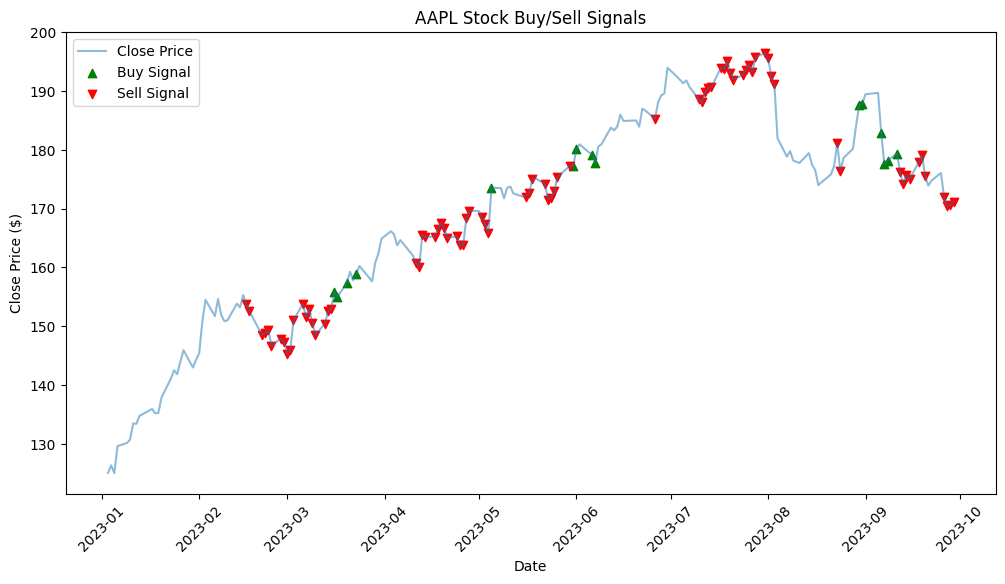

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Load the AAPL stock data
file_path = '../data/AAPL.csv'  # Replace with your file path
aapl_data = pd.read_csv(file_path)

# Initialize the analyzer and apply the strategy
analyzer = AdvancedFinancialAnalyzer()
analyzed_data = analyzer.apply_strategy(aapl_data, short_window=12, long_window=26, volume_window=20)

# Display the head of the analyzed data
print("Head of the Analyzed Data:")
print(analyzed_data.head(10))

# Plotting the Buy and Sell signals
# Convert 'Date' to datetime for better plotting
analyzed_data['Date'] = pd.to_datetime(analyzed_data['Date'])

plt.figure(figsize=(12, 6))

# Plotting the close price
plt.plot(analyzed_data['Date'], analyzed_data['Close'], label='Close Price', alpha=0.5)

# Highlighting Buy Signals
plt.scatter(analyzed_data['Date'][analyzed_data['Buy_Signal']], 
            analyzed_data['Close'][analyzed_data['Buy_Signal']], 
            label='Buy Signal', marker='^', color='green')

# Highlighting Sell Signals
plt.scatter(analyzed_data['Date'][analyzed_data['Sell_Signal']], 
            analyzed_data['Close'][analyzed_data['Sell_Signal']], 
            label='Sell Signal', marker='v', color='red')

plt.title('AAPL Stock Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## 1. MACD and Signal Line Plot
The MACD (Moving Average Convergence Divergence) is a trend-following momentum indicator that shows the relationship between two moving averages of prices. The MACD line (blue) is the difference between the 12-day and 26-day exponential moving averages (EMAs), and the Signal Line (red) is an EMA of the MACD line. This plot helps identify buy and sell signals based on crossovers.

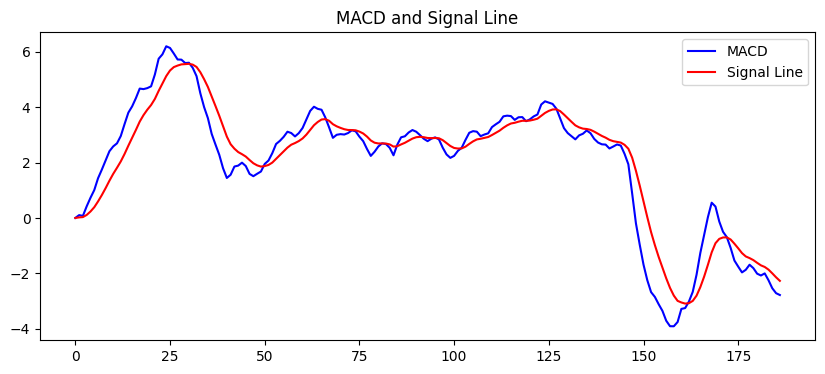

In [4]:
plt.figure(figsize=(10,4))
plt.plot(analyzed_data.index, analyzed_data['MACD'], label='MACD', color='blue')
plt.plot(analyzed_data.index, analyzed_data['Signal_Line'], label='Signal Line', color='red')
plt.legend()
plt.title('MACD and Signal Line')
plt.show()

## 2. Bollinger Bands Visualization
Bollinger Bands are a type of price envelope developed by John Bollinger. They consist of a middle band being a simple moving average (SMA), surrounded by an upper and lower band that are calculated based on the standard deviation of the SMA. This plot is useful for identifying overbought and oversold conditions.

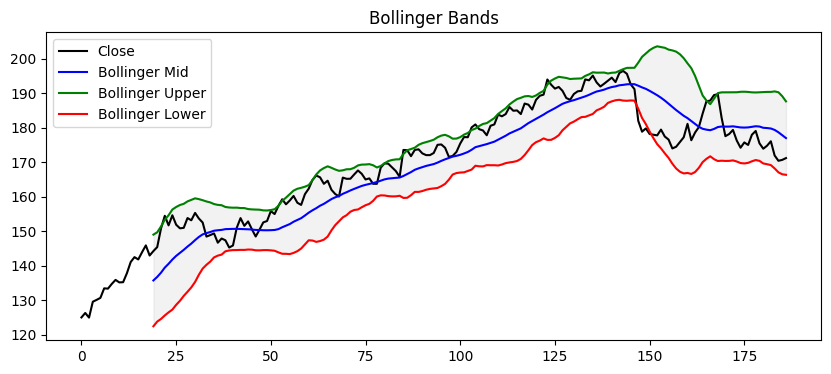

In [5]:
plt.figure(figsize=(10,4))
plt.plot(analyzed_data.index, analyzed_data['Close'], label='Close', color='black')
plt.plot(analyzed_data.index, analyzed_data['Bollinger_Mid'], label='Bollinger Mid', color='blue')
plt.plot(analyzed_data.index, analyzed_data['Bollinger_Upper'], label='Bollinger Upper', color='green')
plt.plot(analyzed_data.index, analyzed_data['Bollinger_Lower'], label='Bollinger Lower', color='red')
plt.fill_between(analyzed_data.index, analyzed_data['Bollinger_Upper'], analyzed_data['Bollinger_Lower'], color='grey', alpha=0.1)
plt.legend()
plt.title('Bollinger Bands')
plt.show()

## 3. RSI Indicator Plot
The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally, and according to Wilder, RSI is considered overbought when above 70 and oversold when below 30.

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(analyzed_data.index, analyzed_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.show()

## 4. Candlestick Chart with Buy/Sell Signals
Candlestick charts are a visual aid for decision making in stock, foreign exchange, commodity, and option trading. When combined with Buy/Sell signals, it helps in identifying potential entry and exit points.

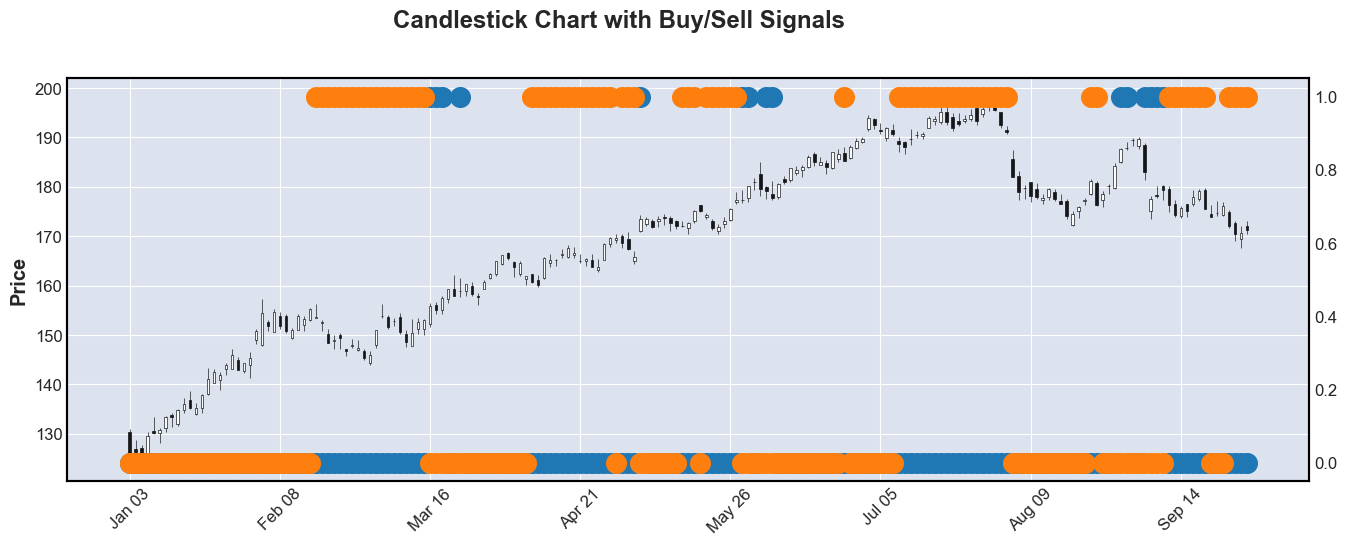

In [7]:
import mplfinance as mpf

# Assuming analyzed_data is your DataFrame
# Make sure the 'Date' column is in a proper datetime format
analyzed_data['Date'] = pd.to_datetime(analyzed_data['Date'])

# Set the 'Date' column as the index of the DataFrame
analyzed_data.set_index('Date', inplace=True)

# Now create the additional plot
apd = mpf.make_addplot(analyzed_data[['Buy_Signal', 'Sell_Signal']], scatter=True, markersize=200)

# Plot the candlestick chart
mpf.plot(analyzed_data, type='candle', addplot=apd, figratio=(12,4), title='Candlestick Chart with Buy/Sell Signals')

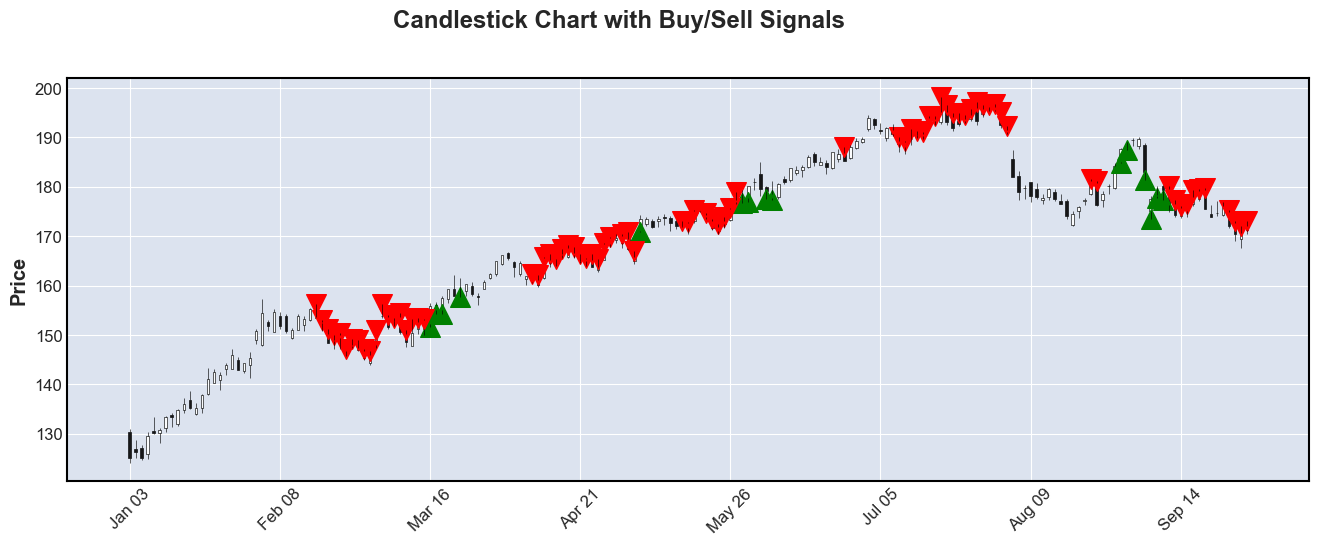

In [8]:

# Assuming Buy_Signal and Sell_Signal are boolean columns where True indicates a signal
# Replace False with np.nan since mplfinance cannot handle pd.NA
buy_signals = analyzed_data['Buy_Signal'].replace(False, np.nan)
sell_signals = analyzed_data['Sell_Signal'].replace(False, np.nan)

# Plotting signals requires them to be at actual price levels; this code assumes buy at Low and sell at High price
# We multiply the signals by the Low and High prices to place the markers; True * price = price, np.nan remains np.nan
buy_prices = buy_signals * analyzed_data['Low']
sell_prices = sell_signals * analyzed_data['High']

# Create additional plots for buy and sell signals
apd_buy = mpf.make_addplot(buy_prices, type='scatter', markersize=200, marker='^', color='green', secondary_y=False)
apd_sell = mpf.make_addplot(sell_prices, type='scatter', markersize=200, marker='v', color='red', secondary_y=False)

# Plot the candlestick chart with buy and sell signals
mpf.plot(analyzed_data, type='candle', addplot=[apd_buy, apd_sell], figratio=(12,4), title='Candlestick Chart with Buy/Sell Signals')
